<a href="https://colab.research.google.com/github/supathdhitalGEO/raster-data-processing-using-GDAL/blob/main/gdalbasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from osgeo import gdal,ogr
import numpy as np
import matplotlib.pyplot as plt

**Importing the Raster File**

In [2]:
file = "/content/sample.tif"
raster= gdal.Open(file)
print(raster)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f3f6f417a20> >


**Getting the Raster Band**

In [3]:
show= raster.GetRasterBand(4)
print(show)

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f3f5389eab0> >


In [4]:
data= show.ReadAsArray()
print(data)

[[     nan      nan      nan ... 0.048332      nan      nan]
 [     nan      nan      nan ... 0.050892      nan      nan]
 [0.103664 0.080192 0.066104 ... 0.049728      nan      nan]
 ...
 [     nan      nan 0.17476  ... 0.092548 0.078982 0.090706]
 [     nan      nan 0.141002 ...      nan      nan      nan]
 [     nan      nan 0.109226 ...      nan      nan      nan]]


**To plot any graph and any data in GDAL matplotlib.pyplot library is available**

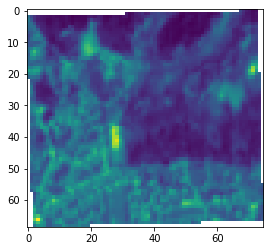

In [5]:
plt.imshow(data)

**to know the projection system of this raster data**

In [6]:
projection = raster.GetProjection()
print(projection)

PROJCS["WGS 84 / UTM zone 44N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32644"]]


**To know the no of bands present in this .tif file:**

In [7]:
print('bands=', raster.RasterCount)
print('Size=',raster.RasterXSize, 'x' , raster.RasterYSize)

bands= 23
Size= 75 x 69


For data type

In [8]:
print('Data Type=',gdal.GetDataTypeName(show.DataType))

Data Type= Float32


**To Reproject the raster data in differnt CRS using gdal.Wrap utility**

In [9]:
reprojection=gdal.Warp("reprj.tif", raster, dstSRS="EPSG:4326")
print(reprojection.GetProjection())

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]


**To know the Raster Data for GeoAffineTransformation**

GT(0) x-coordinate of the upper-left corner of the upper-left pixel.

GT(1) w-e pixel resolution / pixel width.

GT(2) row rotation (typically zero).

GT(3) y-coordinate of the upper-left corner of the upper-left pixel.

GT(4) column rotation (typically zero).

GT(5) n-s pixel resolution / pixel height (negative value for a north-up image).

In [10]:
transform = raster.GetGeoTransform()
print(transform)

(839510.0, 10.0, 0.0, 3069720.0, 0.0, -10.0)


**Tranforming the Resolution of the image by X and Y  and ploting this with 200m pixel resolution**

(839510.0, 200.0, 0.0, 3069720.0, 0.0, -200.0)


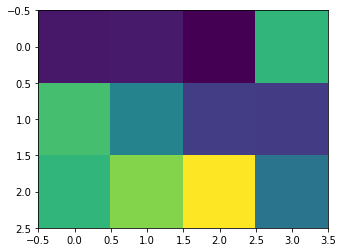

In [11]:
regeotransform = gdal.Warp("geotransform", raster, xRes=200, yRes=200)
print(regeotransform.GetGeoTransform())
plt.imshow(regeotransform.GetRasterBand(4).ReadAsArray())